# LDG - Loss Given Default

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
data_backup = pd.read_csv('credit_risk_dataset_preprocessed.csv', index_col=0)

In [9]:
credit_data = data_backup.copy()

In [10]:
pd.options.display.max_columns = None

In [11]:
pd.options.display.max_rows = 100

In [12]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


For simplicity and lack of detailed information reasons, I will use the loan_status = 1 to represent the defaulted accounts.

In [13]:
credit_data_default = credit_data[credit_data['loan_status'] == 1]

In [14]:
credit_data_default.shape

(7108, 32)

In [15]:
credit_data_default.isnull().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership:MORTGAGE    0
person_home_ownership:OTHER       0
person_home_ownership:OWN         0
person_home_ownership:RENT        0
loan_grade:A                      0
loan_grade:B                      0
loan_grade:C                      0
loan_grade:D                      0
loan_grade:E                      0
loan_grade:F                      0
loan_grade:G                      0
cb_person_default_on_file:N       0
cb_person_default_on_file:Y       0
loan_intent:DEBTCONSOLIDATION     0
loan_intent:EDUCATION             0
loan_intent:HOMEIMPROVEMENT 

In [17]:
credit_data_default.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### Now, let's create a column of recovery amount for each row. I will first random select 30% of the data to set the recovery amount as 0. Then, for the rest of the data, I will assign a random number between 0 and the total loan amount. The random numbers abide beta distribution (alpha = 2, beta = 5), to the proportion of the loan amount.

In [92]:
credit_data_default_LGD_1 = credit_data_default.sample(frac=0.7, random_state=42)

In [93]:
credit_data_default_LGD_0 = credit_data_default[~credit_data_default.isin(credit_data_default_LGD_1)].dropna()

In [94]:
credit_data_default.shape

(7108, 33)

In [95]:
credit_data_default_LGD_0.shape

(2132, 33)

In [96]:
credit_data_default_LGD_1.shape

(4976, 33)

In [97]:
credit_data_default_LGD_0['recovery'] = 0.0

In [98]:
credit_data_default_LGD_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132 entries, 2 to 32556
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      2132 non-null   float64
 1   person_income                   2132 non-null   float64
 2   person_home_ownership           2132 non-null   object 
 3   person_emp_length               2132 non-null   float64
 4   loan_intent                     2132 non-null   object 
 5   loan_grade                      2132 non-null   object 
 6   loan_amnt                       2132 non-null   float64
 7   loan_int_rate                   2132 non-null   float64
 8   loan_status                     2132 non-null   float64
 9   loan_percent_income             2132 non-null   float64
 10  cb_person_default_on_file       2132 non-null   object 
 11  cb_person_cred_hist_length      2132 non-null   float64
 12  person_home_ownership:MORTGAGE  2

In [99]:
credit_data_default_LGD_1['recovery'] = round(credit_data_default_LGD_1['loan_amnt'] * np.random.beta(2,5,credit_data_default_LGD_1.shape[0]))

In [100]:
credit_data_default_LGD_1.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,total_rec_prcp,recovery
21472,33,19200,RENT,0.0,PERSONAL,B,6000,10.65,1,0.31,N,6,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1863.0,776.0
18804,27,27000,OWN,0.0,EDUCATION,G,11500,20.11,1,0.43,N,9,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,6713.0,1390.0
19105,27,15600,RENT,1.0,HOMEIMPROVEMENT,D,2250,18.25,1,0.14,N,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,2178.0,728.0
20561,28,88000,RENT,3.0,PERSONAL,B,10000,10.65,1,0.11,N,9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4584.0,4450.0
16782,25,49000,RENT,1.0,PERSONAL,D,12000,13.49,1,0.24,N,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,5985.0,730.0
19863,28,41500,RENT,3.0,MEDICAL,D,11000,15.33,1,0.27,Y,5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,3867.0,2718.0
23005,30,35600,RENT,0.0,EDUCATION,D,8000,14.59,1,0.22,N,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2937.0,3381.0
548,26,42000,RENT,0.0,MEDICAL,F,21000,17.26,1,0.50,Y,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,14160.0,6878.0
30835,36,60000,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000,14.11,1,0.22,Y,14,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,4708.0,2713.0
15479,24,128000,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000,17.27,1,0.14,Y,2,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,15119.0,8893.0


In [101]:
credit_data_default_LGD = pd.concat([credit_data_default_LGD_1, credit_data_default_LGD_0])

In [102]:
credit_data_default_LGD['recovery'].describe()

count     7108.000000
mean      2161.447524
std       2783.491444
min          0.000000
25%          0.000000
50%       1210.500000
75%       3182.250000
max      21883.000000
Name: recovery, dtype: float64

### Dependent Variables: LGD

In [103]:
credit_data_default_LGD['recovery_rate'] = credit_data_default_LGD['recovery'] / credit_data_default_LGD['loan_amnt']

In [104]:
credit_data_default_LGD['recovery_rate'].describe()

count    7108.000000
mean        0.200709
std         0.188164
min         0.000000
25%         0.000000
50%         0.176492
75%         0.326816
max         0.874733
Name: recovery_rate, dtype: float64

(array([2.157e+03, 7.300e+01, 7.800e+01, 1.060e+02, 1.340e+02, 1.730e+02,
        1.940e+02, 1.820e+02, 2.200e+02, 2.220e+02, 2.150e+02, 2.180e+02,
        2.000e+02, 2.070e+02, 1.930e+02, 2.100e+02, 2.150e+02, 2.120e+02,
        1.750e+02, 1.790e+02, 1.540e+02, 1.240e+02, 1.370e+02, 1.170e+02,
        1.140e+02, 1.090e+02, 1.060e+02, 8.200e+01, 7.700e+01, 7.100e+01,
        7.800e+01, 4.200e+01, 5.500e+01, 4.800e+01, 4.700e+01, 2.600e+01,
        3.000e+01, 2.200e+01, 1.700e+01, 1.500e+01, 1.800e+01, 1.000e+01,
        1.400e+01, 7.000e+00, 6.000e+00, 9.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00]),
 array([0.        , 0.01749467, 0.03498933, 0.052484  , 0.06997867,
        0.08747333, 0.104968  , 0.12246267, 0.13995733, 0.157452  ,
        0.17494667, 0.19244133, 0.209936  , 0.22743067, 0.24492533,
        0.26242   , 0.27991467, 0.29740933, 0.314904  , 0.33239867,
        0.34989333, 0.367388  , 0.38488267, 0.40237733, 0.419872  ,
        0.43736667, 0.45486133, 0.47

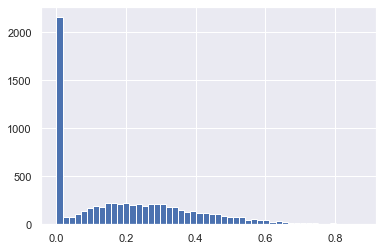

In [105]:
plt.hist(credit_data_default_LGD['recovery_rate'], bins=50)

'recovery_rate' is the dependent variable of LGD.

### Dependent Variables: EAD

We will compute the credit conversion factor, which is the amount not paid devided by the total loan amount.

### Similarly to LGD model, we create the total recovery principal for each input. The number will be randonly selected between 0 and to total loan amount. Please note that this is a different case from the LGD model. And those two cases are for demonstrative purpose.

The random number

In [63]:
credit_data_default_EAD = credit_data_default.copy()

In [64]:
credit_data_default_EAD['total_rec_prcp'] = round(credit_data_default_EAD['loan_amnt'] * np.random.uniform(0,1,credit_data_default_EAD.shape[0]))

In [65]:
credit_data_default_EAD.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,total_rec_prcp
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,14916.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1370.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,20275.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,15031.0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1530.0


In [66]:
credit_data_default_EAD['CCF'] = (credit_data_default_EAD['loan_amnt'] - credit_data_default_EAD['total_rec_prcp']) / credit_data_default_EAD['loan_amnt']

In [67]:
credit_data_default_EAD['CCF'].describe()

count    7108.000000
mean        0.499903
std         0.288063
min         0.000083
25%         0.253281
50%         0.498541
75%         0.746638
max         1.000000
Name: CCF, dtype: float64

(array([134., 148., 155., 147., 144., 145., 137., 136., 160., 130., 116.,
        138., 141., 107., 148., 132., 145., 150., 157., 160., 163., 151.,
        142., 135., 143., 129., 134., 150., 157., 136., 162., 150., 152.,
        132., 136., 146., 133., 151., 145., 141., 140., 124., 128., 125.,
        142., 143., 151., 148., 139., 150.]),
 array([8.33333333e-05, 2.00816667e-02, 4.00800000e-02, 6.00783333e-02,
        8.00766667e-02, 1.00075000e-01, 1.20073333e-01, 1.40071667e-01,
        1.60070000e-01, 1.80068333e-01, 2.00066667e-01, 2.20065000e-01,
        2.40063333e-01, 2.60061667e-01, 2.80060000e-01, 3.00058333e-01,
        3.20056667e-01, 3.40055000e-01, 3.60053333e-01, 3.80051667e-01,
        4.00050000e-01, 4.20048333e-01, 4.40046667e-01, 4.60045000e-01,
        4.80043333e-01, 5.00041667e-01, 5.20040000e-01, 5.40038333e-01,
        5.60036667e-01, 5.80035000e-01, 6.00033333e-01, 6.20031667e-01,
        6.40030000e-01, 6.60028333e-01, 6.80026667e-01, 7.00025000e-01,
        7.

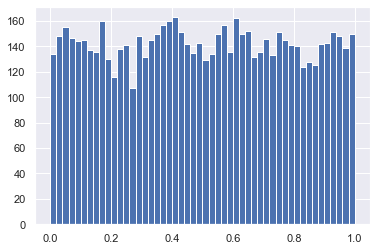

In [84]:
plt.hist(credit_data_default_EAD['CCF'], bins=50)